In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
file_path = "Cell-Cycle-Set.xlsx"
df = pd.read_excel(file_path)
df = df.dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1 to 498
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gene_Name        397 non-null    object 
 1   mean_RNA_G1      397 non-null    float64
 2   mean_RNA_S       397 non-null    float64
 3   mean_RNA_G2      397 non-null    float64
 4   mean_protein_G1  397 non-null    float64
 5   mean_protein_S   397 non-null    float64
 6   mean_protein_G2  397 non-null    float64
 7   GOBP             397 non-null    object 
 8   GOMF             397 non-null    object 
 9   GOCC             397 non-null    object 
dtypes: float64(6), object(4)
memory usage: 34.1+ KB
None


## Part 1

**Calculate the variance and mean of the protein and mRNA concentrations**

In [3]:
# Calculate variance and mean of RNA and protein concentrations
rna_columns = ['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2']
protein_columns = ['mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']
 
variance_rna = df[rna_columns].var()
variance_protein = df[protein_columns].var()
 
mean_rna = df[rna_columns].mean()
mean_protein = df[protein_columns].mean()

print("Variance of RNA concentrations:")
print(variance_rna)
print("\nVariance of Protein concentrations:")
print(variance_protein)

print("\nMean of RNA concentrations:")
print(mean_rna)
print("\nMean of Protein concentrations:")
print(mean_protein)

Variance of RNA concentrations:
mean_RNA_G1    2.160506
mean_RNA_S     2.145592
mean_RNA_G2    2.101649
dtype: float64

Variance of Protein concentrations:
mean_protein_G1    10.453574
mean_protein_S     10.403018
mean_protein_G2    10.018217
dtype: float64

Mean of RNA concentrations:
mean_RNA_G1    11.215627
mean_RNA_S     11.186962
mean_RNA_G2    11.257939
dtype: float64

Mean of Protein concentrations:
mean_protein_G1    25.351672
mean_protein_S     22.847658
mean_protein_G2    25.573553
dtype: float64


**Generate a histogram of one of the cell cycle stages of the RNA and protein distribution**

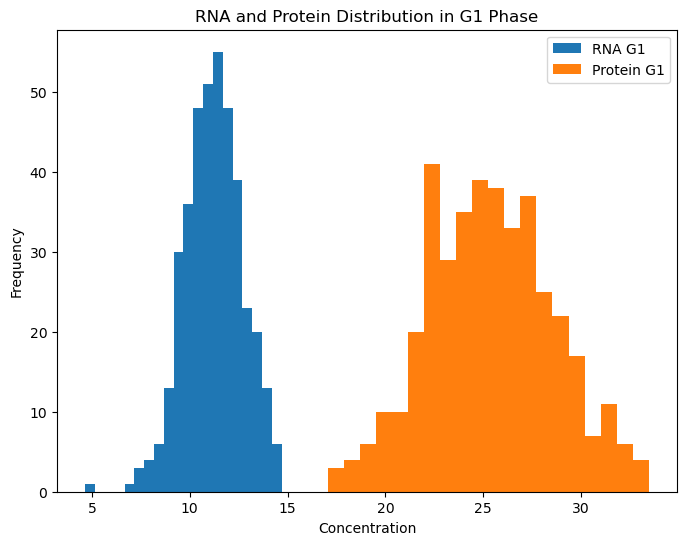

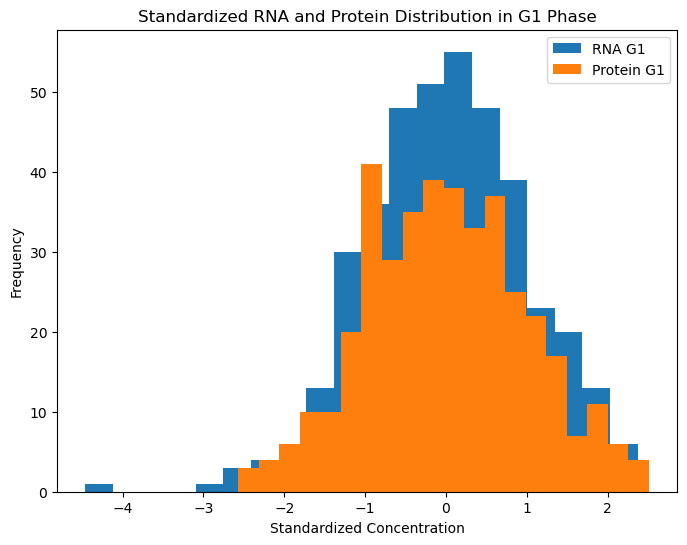

In [4]:
# Generate a histogram of RNA and protein distribution for one cell cycle stage
plt.figure(figsize=(8, 6))
plt.hist(df['mean_RNA_G1'], bins=20, label='RNA G1')
plt.hist(df['mean_protein_G1'], bins=20, label='Protein G1')
plt.title('RNA and Protein Distribution in G1 Phase')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Standardize RNA and protein concentrations
std_rna = (df[rna_columns] - mean_rna) / df[rna_columns].std()
std_protein = (df[protein_columns] - mean_protein) / df[protein_columns].std()

plt.figure(figsize=(8, 6))
plt.hist(std_rna['mean_RNA_G1'], bins=20, label='RNA G1')
plt.hist(std_protein['mean_protein_G1'], bins=20, label='Protein G1')
plt.title('Standardized RNA and Protein Distribution in G1 Phase')
plt.xlabel('Standardized Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**State what you notice about these, and how this might affect inferring Protein from mRNA concentrations**

From the histogram above, it is noticable that the concentration of the protein is signicantly higher than the concentration of the RNA.

Typically, a single mRNA is used to synthesise multiple copies of the corresponding protein which could explain why the concentration level of the protein is significantly higher than the RNA. Specifically in the G1 phase, cell growth is occuring where proteins are synthesised to prepare for the S phase.

With this we can identify some relationship between protein and mRNA concentrations because as mRNA concentration increases, the potential for protein synthensis to occur is higher.

In [5]:
stages = ['G1', 'S', 'G2']

**Generate a scatterplot of the RNA vs Protein concentrations for each stage of the cell cycle.**

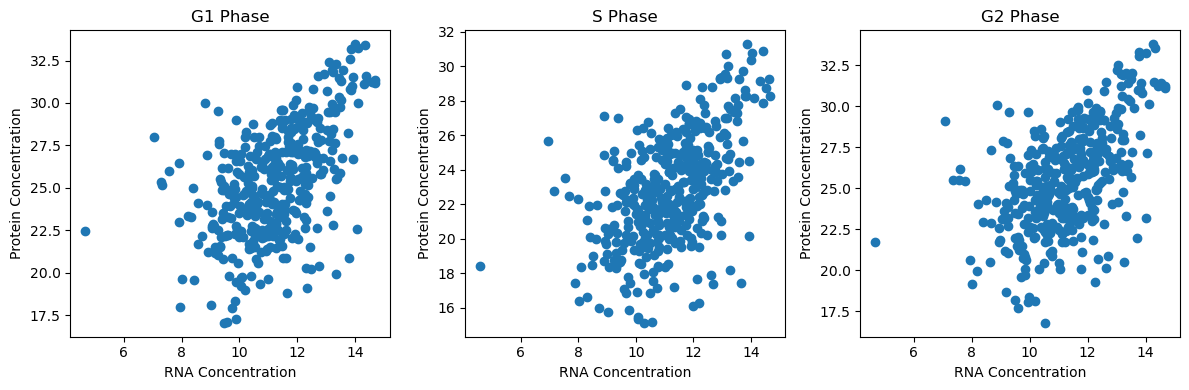

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, stage in enumerate(stages):
    axes[i].scatter(df[f'mean_RNA_{stage}'], df[f'mean_protein_{stage}'])
    axes[i].set_title(f'{stage} Phase')
    axes[i].set_xlabel('RNA Concentration')
    axes[i].set_ylabel('Protein Concentration')

plt.tight_layout()
plt.show()

**Fit a linear model (use sklearn or your own direct solve of linear regression)**

G1 Phase RMSE: 2.7529658342371697


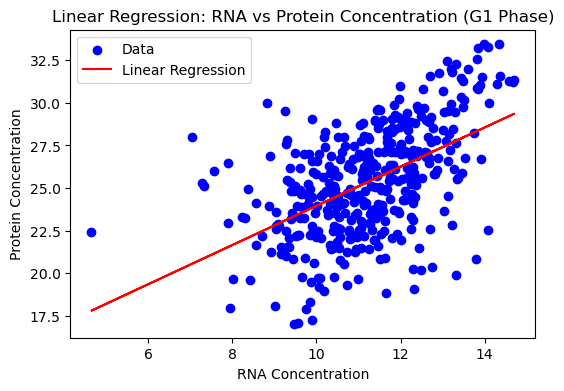

S Phase RMSE: 2.719095472683103


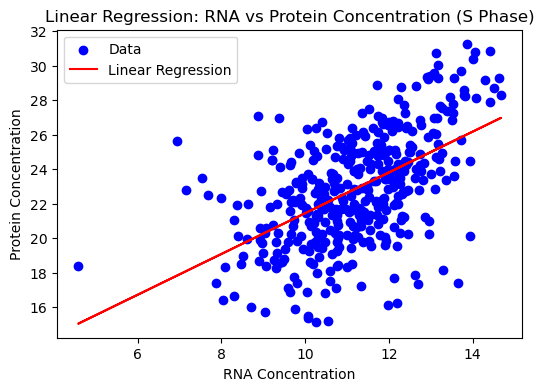

G2 Phase RMSE: 2.6755780028716756


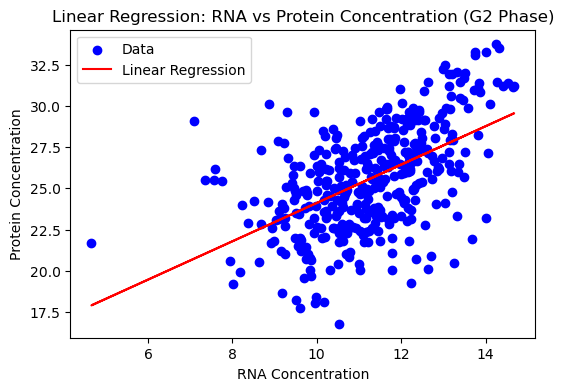

In [7]:
for stage in stages:
    X = df[f'mean_RNA_{stage}'].values.reshape(-1, 1)
    y = df[f'mean_protein_{stage}']

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linear = LinearRegression()
    linear.fit(X, y)

    y_pred = linear.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f'{stage} Phase RMSE: {rmse}')

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Linear Regression')
    plt.title(f'Linear Regression: RNA vs Protein Concentration ({stage} Phase)')
    plt.xlabel('RNA Concentration')
    plt.ylabel('Protein Concentration')
    plt.legend()
    plt.show()

**How accurate would predicitons of Protein concentration be using just RNA concentration? Can you quantify this?**

To calculate the accuracy of our linear regression model, we can make use of RMSE. On average, an RMSE of 2.176 was achieved in the three phases. This means that on average we are 2.176 units away from an accurate protein prediction given an RNA. As the range of the protein concentration is around 17-33, an RMSE of 2.176 might be acceptable but is not completely accurate. 

The large difference in variance in protein concentration (10.292) and RNA concentration (2.136) could explain why our predictions are not the best and that predicting the protein concentration might be more challenging and not as straight foreward as a direct correlation.

Furthermore, by looking at the scatter plots of the data we can see this large variance in protein concentration which may require a more complex model than a linear one.

## Part 2

**Find all genes that contain ‘cell cycle’ in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase.**

Calculate the correlations.

Comment on how these compare, link this to your understanding of the Cell Cycle

G1 phase RNA-Protein Correlation: 0.522657733063862


G1 phase "cell cycle" RNA-Protein Correlation: 0.4365460497902055

S phase RNA-Protein Correlation: 0.5361902686743045
S phase "cell cycle" RNA-Protein Correlation: 0.43838828414419223

G2 phase RNA-Protein Correlation: 0.5325650185250105
G2 phase "cell cycle" RNA-Protein Correlation: 0.4533272550044794



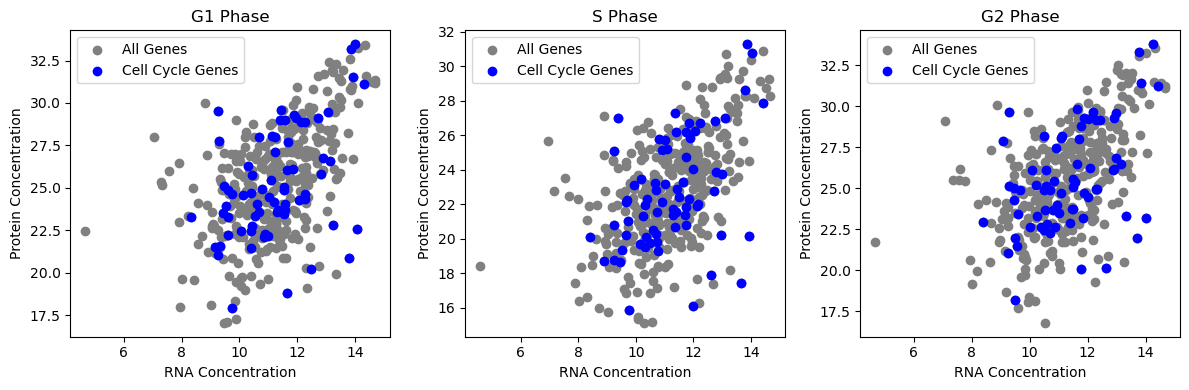

In [8]:
cell_cycle_GOBP = df[df.GOBP.str.contains('cell cycle', case = False)]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, stage in enumerate(stages):
    axes[i].scatter(df[f'mean_RNA_{stage}'], df[f'mean_protein_{stage}'], color='gray', label='All Genes')
    axes[i].scatter(cell_cycle_GOBP[f'mean_RNA_{stage}'], cell_cycle_GOBP[f'mean_protein_{stage}'], color='blue', label='Cell Cycle Genes')
    axes[i].set_title(f'{stage} Phase')
    axes[i].set_xlabel('RNA Concentration')
    axes[i].set_ylabel('Protein Concentration')
    axes[i].legend()

    stage_corr = df[f'mean_RNA_{stage}'].corr(df[f'mean_protein_{stage}'])
    print(f'{stage} phase RNA-Protein Correlation: {stage_corr}')

    stage_corr = cell_cycle_GOBP[f'mean_RNA_{stage}'].corr(cell_cycle_GOBP[f'mean_protein_{stage}'])
    print(f'{stage} phase "cell cycle" RNA-Protein Correlation: {stage_corr}\n')

plt.tight_layout()
plt.show()


The correlation of the RNA and protein concentration at each phase for genes related to cell cycle is positive but weak. The 'cell cycle' correlation is also lower than the overall correlation which could indicate that genes related to the cell cycle are more complex.

**Find all genes that contain ‘ribosome’ in their GOCC term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase.**

Calculate the correlations.

Comment on how these compare, link this to your understanding of the Cell Cycle.

G1 phase RNA-Protein Correlation: 0.522657733063862
G1 phase "ribosome" RNA-Protein Correlation: 0.8408005925694083

S phase RNA-Protein Correlation: 0.5361902686743045
S phase "ribosome" RNA-Protein Correlation: 0.8448011378787453

G2 phase RNA-Protein Correlation: 0.5325650185250105
G2 phase "ribosome" RNA-Protein Correlation: 0.8477056210062089



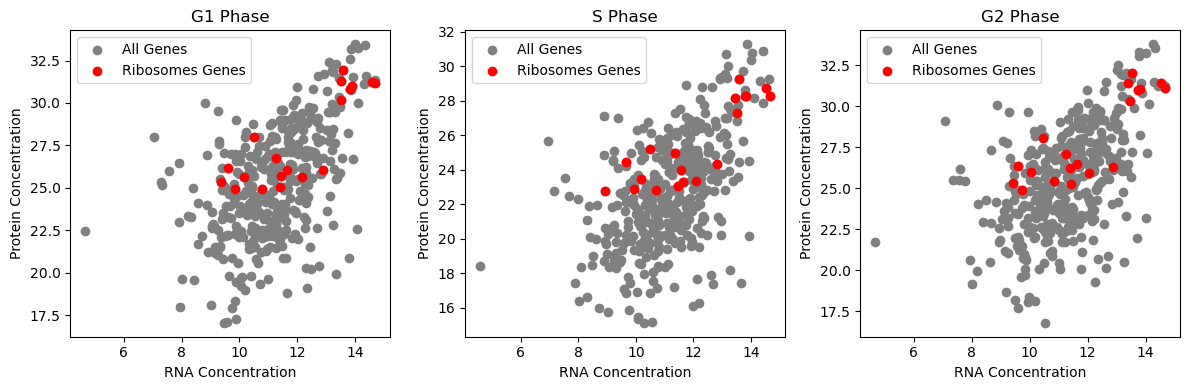

In [9]:
cell_cycle_GOCC = df[df.GOCC.str.contains('ribosome', case = False)]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, stage in enumerate(stages):
    axes[i].scatter(df[f'mean_RNA_{stage}'], df[f'mean_protein_{stage}'], color='gray', label='All Genes')
    axes[i].scatter(cell_cycle_GOCC[f'mean_RNA_{stage}'], cell_cycle_GOCC[f'mean_protein_{stage}'], color='red', label='Ribosomes Genes')
    axes[i].set_title(f'{stage} Phase')
    axes[i].set_xlabel('RNA Concentration')
    axes[i].set_ylabel('Protein Concentration')
    axes[i].legend()

    stage_corr = df[f'mean_RNA_{stage}'].corr(df[f'mean_protein_{stage}'])
    print(f'{stage} phase RNA-Protein Correlation: {stage_corr}')
    
    stage_corr = cell_cycle_GOCC[f'mean_RNA_{stage}'].corr(cell_cycle_GOCC[f'mean_protein_{stage}'])
    print(f'{stage} phase "ribosome" RNA-Protein Correlation: {stage_corr}\n')

plt.tight_layout()
plt.show()

The correlation of the RNA and protein concentration at each phase for genes related to ribosomes is very strong. This indicates that there is a stronger relationship between the two. 

This aligns with our understanding of the cell cycle as we know that ribosomes play a crucial role in protein synthesis. Ribosomes decode the genetic information from the mRNA to synthesise proteins thus if there is an increase in mRNA concentration, then protein concentration will likely increase to a similar degree.

**Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?**

In [10]:
pd.set_option('display.max_rows', None)

print(df.GOBP.str.split(";").explode().value_counts())

GOBP
cellular process                                                                                                                                       377
metabolic process                                                                                                                                      273
cellular metabolic process                                                                                                                             260
primary metabolic process                                                                                                                              255
biological regulation                                                                                                                                  236
regulation of biological process                                                                                                                       225
macromolecule metabolic process                                  

One difficulty we may face is ambiguity and redundancy. Many terms encompass one another (e.g. cellular component organization or biogenesis at cellular level and cellular component organization at cellular level) and it might become difficult to distinguish them from eachother.

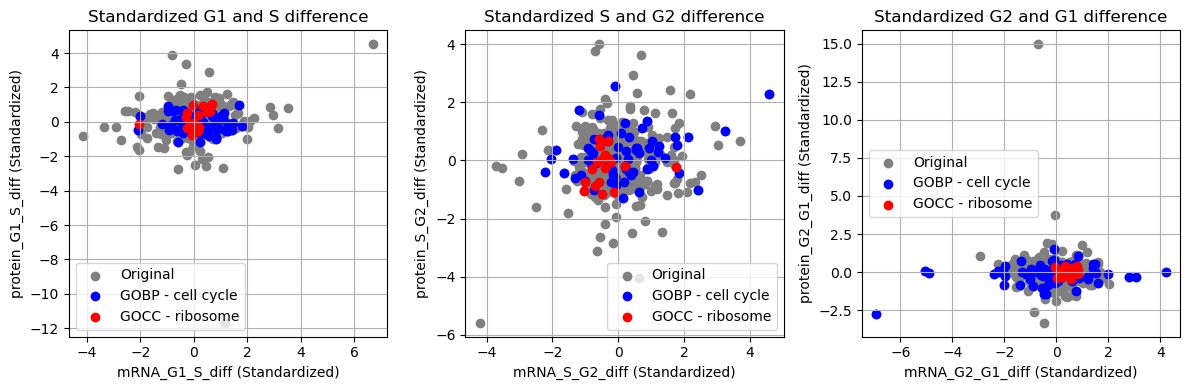

In [11]:
# Calculate differences in mRNA and protein levels across cell cycle stages
df['mRNA_G1_S_diff'] = df['mean_RNA_S'] - df['mean_RNA_G1']
df['mRNA_S_G2_diff'] = df['mean_RNA_G2'] - df['mean_RNA_S']
df['mRNA_G2_G1_diff'] = df['mean_RNA_G1'] - df['mean_RNA_G2']

df['protein_G1_S_diff'] = df['mean_protein_S'] - df['mean_protein_G1']
df['protein_S_G2_diff'] = df['mean_protein_G2'] - df['mean_protein_S']
df['protein_G2_G1_diff'] = df['mean_protein_G1'] - df['mean_protein_G2']

df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

cell_cycle_GOBP = df[df.GOBP.str.contains('cell cycle', case=False)]
cell_cycle_GOCC = df[df.GOCC.str.contains('ribosome', case=False)]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(df['mRNA_G1_S_diff'], df['protein_G1_S_diff'], color='grey', label='Original')
axes[0].scatter(cell_cycle_GOBP['mRNA_G1_S_diff'], cell_cycle_GOBP['protein_G1_S_diff'], color='blue', label='GOBP - cell cycle')
axes[0].scatter(cell_cycle_GOCC['mRNA_G1_S_diff'], cell_cycle_GOCC['protein_G1_S_diff'], color='red', label='GOCC - ribosome')
axes[0].set_xlabel('mRNA_G1_S_diff (Standardized)')
axes[0].set_ylabel('protein_G1_S_diff (Standardized)')
axes[0].set_title('Standardized G1 and S difference')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(df['mRNA_S_G2_diff'], df['protein_S_G2_diff'], color='grey', label='Original')
axes[1].scatter(cell_cycle_GOBP['mRNA_S_G2_diff'], cell_cycle_GOBP['protein_S_G2_diff'], color='blue', label='GOBP - cell cycle')
axes[1].scatter(cell_cycle_GOCC['mRNA_S_G2_diff'], cell_cycle_GOCC['protein_S_G2_diff'], color='red', label='GOCC - ribosome')
axes[1].set_xlabel('mRNA_S_G2_diff (Standardized)')
axes[1].set_ylabel('protein_S_G2_diff (Standardized)')
axes[1].set_title('Standardized S and G2 difference')
axes[1].legend()
axes[1].grid(True)

axes[2].scatter(df['mRNA_G2_G1_diff'], df['protein_G2_G1_diff'], color='grey', label='Original')
axes[2].scatter(cell_cycle_GOBP['mRNA_G2_G1_diff'], cell_cycle_GOBP['protein_G2_G1_diff'], color='blue', label='GOBP - cell cycle')
axes[2].scatter(cell_cycle_GOCC['mRNA_G2_G1_diff'], cell_cycle_GOCC['protein_G2_G1_diff'], color='red', label='GOCC - ribosome')
axes[2].set_xlabel('mRNA_G2_G1_diff (Standardized)')
axes[2].set_ylabel('protein_G2_G1_diff (Standardized)')
axes[2].set_title('Standardized G2 and G1 difference')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In the scatter plots above, we can see that there are typically only slight changes in RNA and protein concentration. We can also see that the data points containing 'ribosome' in the GOCC label are clustered together and show the least amount of change between each stage compared to the overall data. Regarding genes containing 'cell cycle' in the GOBP label, there doesn't seem to be any clustering different from the overall dataset.